In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:

# Load the CSV file
file_path = "Data/raw/community_issues_dataset_long.csv"
data = pd.read_csv(file_path)

In [23]:
# Drop the 'Category' column
data = data.drop(columns=['Category'])

# Confirm that the column is dropped by displaying the first few rows
# data.info()
data.tail(5)


,Issue Name,Severity,Frequency,Sentiment,Letter Text
96995,_RARE_,Medium,Occasional,Neutral,"Dear Council,\n\nI am writing to formally rais..."
96996,_RARE_,Low,Rare,Positive,"Dear Council,\n\nI am writing to formally rais..."
96997,_RARE_,Low,Occasional,Neutral,"Dear Council,\n\nI am writing to formally rais..."
96998,_RARE_,Low,Occasional,Neutral,"Dear Council,\n\nI am writing to formally rais..."
96999,_RARE_,Low,Rare,Positive,"Dear Council,\n\nI am writing to formally rais..."


In [39]:
total_duplicates = data['Letter Text'].duplicated().sum()
print("Total Duplicates:", total_duplicates)

Total Duplicates: 96903


In [40]:
unique_entries = data['Letter Text'].nunique()
print("Unique Entries:", unique_entries)


Unique Entries: 97


In [25]:

data = data.drop('Issue Name', axis=1)

# Confirm that the column is dropped by displaying the first few rows
data.tail(5)

,Severity,Frequency,Sentiment,Letter Text
96995,Medium,Occasional,Neutral,"Dear Council,\n\nI am writing to formally rais..."
96996,Low,Rare,Positive,"Dear Council,\n\nI am writing to formally rais..."
96997,Low,Occasional,Neutral,"Dear Council,\n\nI am writing to formally rais..."
96998,Low,Occasional,Neutral,"Dear Council,\n\nI am writing to formally rais..."
96999,Low,Rare,Positive,"Dear Council,\n\nI am writing to formally rais..."


In [21]:
data.tail(5)

,Issue Name,Severity,Frequency,Sentiment
96995,_RARE_,Medium,Occasional,Neutral
96996,_RARE_,Low,Rare,Positive
96997,_RARE_,Low,Occasional,Neutral
96998,_RARE_,Low,Occasional,Neutral
96999,_RARE_,Low,Rare,Positive


Distribution for Sentiment:
Sentiment
Positive    43626
Neutral     41002
Negative    12372
Name: count, dtype: int64

----------------------------------------


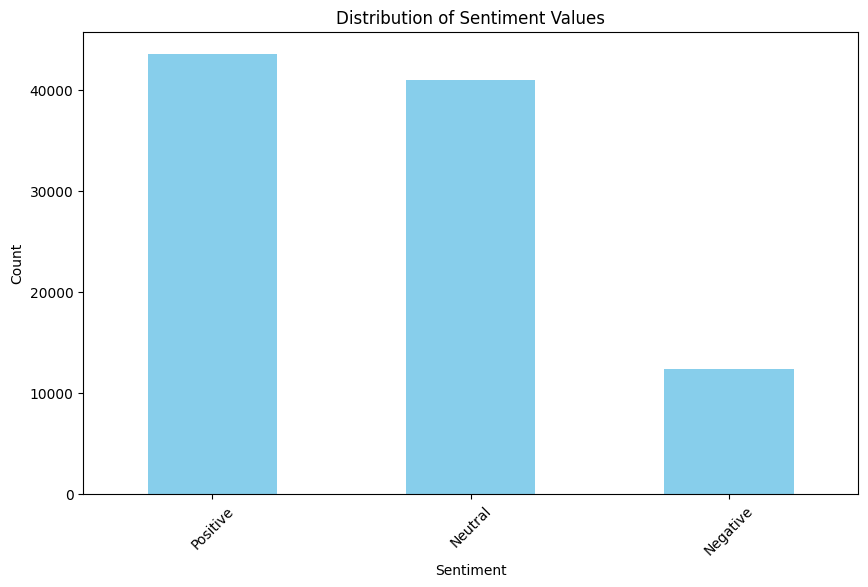

Distribution for Severity:
Severity
Low       41830
Medium    37396
High      17774
Name: count, dtype: int64

----------------------------------------


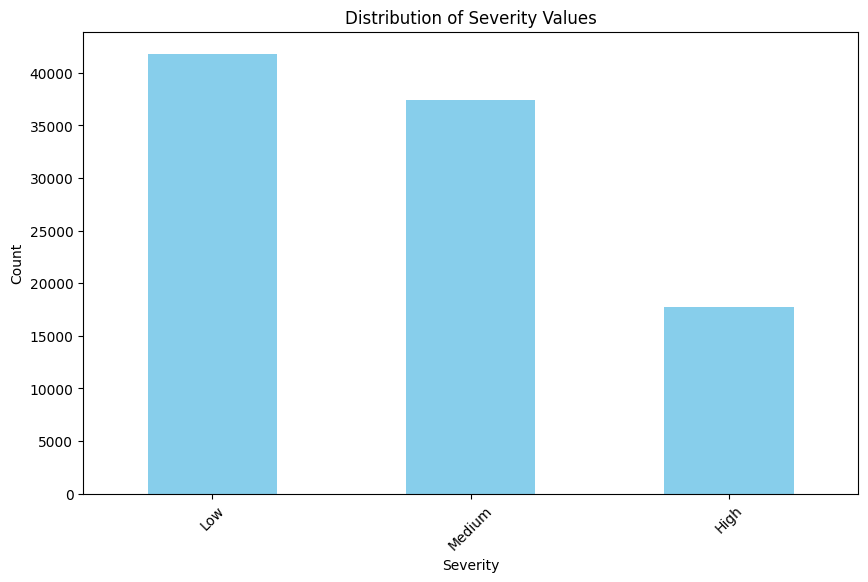

In [26]:


# List of columns you want to check distributions for
columns_to_check = ['Sentiment', 'Severity']

# Loop through each column and check the distribution
for column in columns_to_check:
    # Print the distribution of the column
    print(f"Distribution for {column}:")
    print(data[column].value_counts())
    print("\n" + "-"*40)  # Separator for readability

    # Plot the distribution for each column
    plt.figure(figsize=(10, 6))
    data[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {column} Values')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

Sentiment  Severity
Negative   High        2277
           Low         2277
           Medium      2277
Neutral    High        2277
           Low         2277
           Medium      2277
Positive   High        2277
           Low         2277
           Medium      2277
dtype: int64


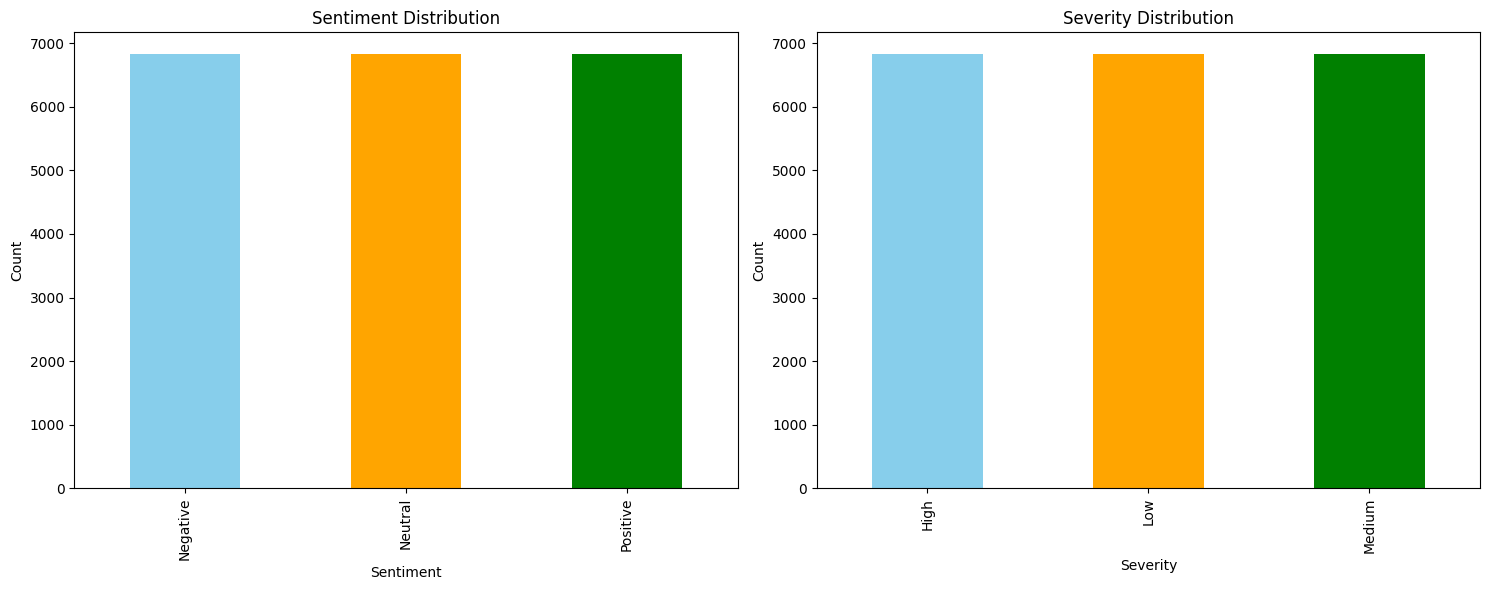

In [27]:

# Step 1: Balance based on 'Severity'
# Find the minimum count for each 'Severity' across different 'Sentiment' groups
severity_group_sizes = data.groupby(['Severity', 'Sentiment']).size().unstack(fill_value=0)
min_severity_count = severity_group_sizes.min().min()  # Minimum value across the severity group combinations

# Create an empty list to store the subsets after balancing 'Severity'
balanced_severity_data = []

for severity, group in data.groupby('Severity'):
    # For each severity level, balance the 'Sentiment' groups individually
    sentiment_groups = group.groupby('Sentiment')
    balanced_groups = []

    # For each sentiment group within the current severity, sample to match the minimum count
    for sentiment, sentiment_group in sentiment_groups:
        sampled_group = sentiment_group.sample(min_severity_count, random_state=42) if len(sentiment_group) > min_severity_count else sentiment_group
        balanced_groups.append(sampled_group)

    # Concatenate the balanced sentiment groups for the current severity
    balanced_severity_data.append(pd.concat(balanced_groups))

# Concatenate all the severity-balanced data into one DataFrame
balanced_severity_data = pd.concat(balanced_severity_data)

# Step 2: Now balance based on 'Sentiment'
# For each 'Sentiment', find the minimum count across the severity levels
sentiment_group_sizes = balanced_severity_data.groupby(['Sentiment', 'Severity']).size().unstack(fill_value=0)
min_sentiment_count = sentiment_group_sizes.min().min()  # Minimum value across sentiment group combinations

# Create an empty list to store the subsets after balancing 'Sentiment'
final_balanced_data = []

for sentiment, group in balanced_severity_data.groupby('Sentiment'):
    # For each sentiment level, balance the 'Severity' groups individually
    severity_groups = group.groupby('Severity')
    balanced_groups = []

    # For each severity group within the current sentiment, sample to match the minimum count
    for severity, severity_group in severity_groups:
        sampled_group = severity_group.sample(min_sentiment_count, random_state=42) if len(severity_group) > min_sentiment_count else severity_group
        balanced_groups.append(sampled_group)

    # Concatenate the balanced severity groups for the current sentiment
    final_balanced_data.append(pd.concat(balanced_groups))

# Concatenate all the sentiment-balanced data into one DataFrame
final_balanced_data = pd.concat(final_balanced_data)

# Reset the index of the final DataFrame
final_balanced_data = final_balanced_data.reset_index(drop=True)

# Check the distribution in the resulting dataset
print(final_balanced_data.groupby(['Sentiment', 'Severity']).size())

# Optionally, visualize the distribution
import matplotlib.pyplot as plt

# Plot the distribution for both 'Sentiment' and 'Severity'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Sentiment distribution
final_balanced_data['Sentiment'].value_counts().plot(kind='bar', ax=ax1, color=['skyblue', 'orange', 'green'])
ax1.set_title('Sentiment Distribution')
ax1.set_xlabel('Sentiment')
ax1.set_ylabel('Count')

# Severity distribution
final_balanced_data['Severity'].value_counts().plot(kind='bar', ax=ax2, color=['skyblue', 'orange', 'green'])
ax2.set_title('Severity Distribution')
ax2.set_xlabel('Severity')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()


In [30]:
final_balanced_data.tail()

,Severity,Frequency,Sentiment,Letter Text
20488,Medium,Occasional,Positive,"Dear Council,\n\nI am writing to formally rais..."
20489,Medium,Rare,Positive,"Dear Council,\n\nI am writing to formally rais..."
20490,Medium,Occasional,Positive,"Dear Council,\n\nI am writing to formally rais..."
20491,Medium,Rare,Positive,"Dear Council,\n\nI am writing to formally rais..."
20492,Medium,Occasional,Positive,"Dear Council,\n\nI am writing to formally rais..."


In [31]:
print(final_balanced_data.isnull().sum())# Check missing data



Severity       0
Frequency      0
Sentiment      0
Letter Text    0
dtype: int64


In [32]:

final_balanced_data.columns = final_balanced_data.columns.str.replace(' ', '_').str.lower()


In [33]:
final_balanced_data.tail()

,severity,frequency,sentiment,letter_text
20488,Medium,Occasional,Positive,"Dear Council,\n\nI am writing to formally rais..."
20489,Medium,Rare,Positive,"Dear Council,\n\nI am writing to formally rais..."
20490,Medium,Occasional,Positive,"Dear Council,\n\nI am writing to formally rais..."
20491,Medium,Rare,Positive,"Dear Council,\n\nI am writing to formally rais..."
20492,Medium,Occasional,Positive,"Dear Council,\n\nI am writing to formally rais..."


In [36]:
total_duplicates = final_balanced_data['letter_text'].duplicated().sum()
print("Total Duplicates:", total_duplicates)

Total Duplicates: 20396


In [37]:
unique_entries = final_balanced_data['letter_text'].nunique()
print("Unique Entries:", unique_entries)


Unique Entries: 97
